In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing dataset
training_set = pd.read_csv("train_u6lujuX_CVtuZ9i.txt")
test_set = pd.read_csv("test_Y3wMUE5_7gLdaTN.txt")

In [3]:
train_original=training_set.copy()
test_original=test_set.copy()

In [4]:
#Structure of dataset
training_set.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
test_set.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
training_set.dtypes
test_set.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [7]:
training_set.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
#Describing data
training_set.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
test_set.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [10]:
#Univariate Analysis
training_set['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [11]:
#Proportions instead of numbers
training_set['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

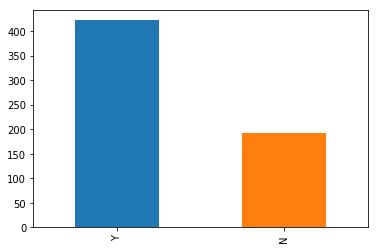

In [12]:
#Visualizing Loan Status
training_set["Loan_Status"].value_counts().plot(kind="bar")

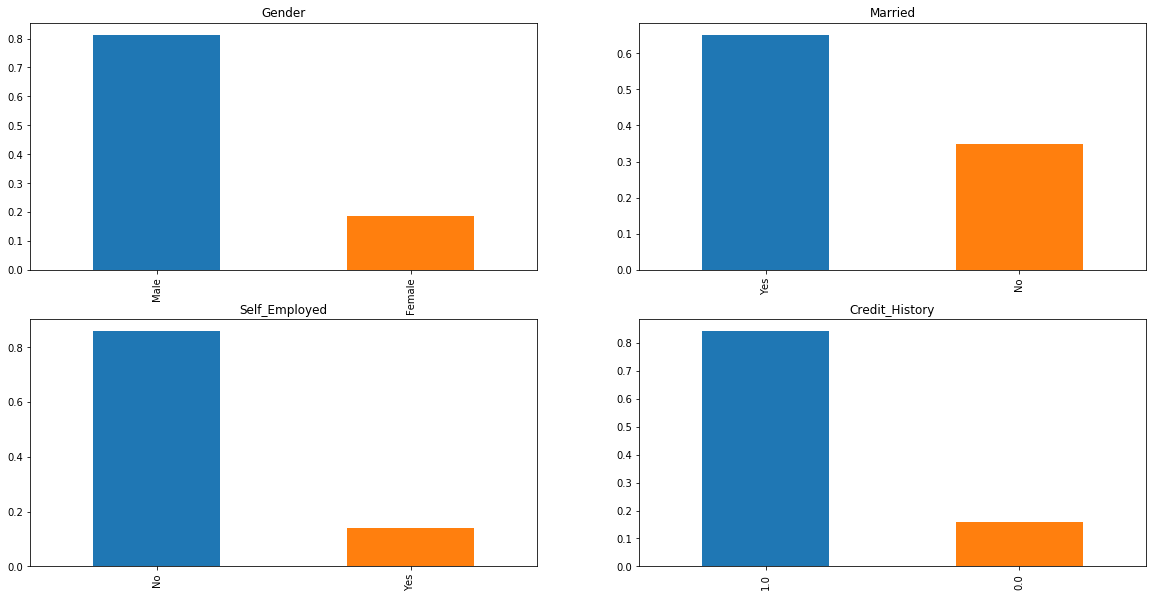

In [13]:
#Visualizing Categorical Independent Variables
plt.figure(1)
plt.subplot(221)
training_set["Gender"].value_counts(normalize=True).plot(kind="bar",figsize=(20,10),title="Gender")
plt.subplot(222)
training_set["Married"].value_counts(normalize=True).plot(kind="bar",figsize=(20,10),title="Married")
plt.subplot(223)
training_set["Self_Employed"].value_counts(normalize=True).plot(kind="bar",figsize=(20,10),title="Self_Employed")
plt.subplot(224)
training_set["Credit_History"].value_counts(normalize=True).plot(kind="bar",figsize=(20,10),title="Credit_History")
plt.show()

In [14]:
#From above graph, we see that around 80% applicants are male
# Around 65% of the applicants are married
# Around 15% of the applicants are slef employed
# Around 85% of the applicants have repaid their debts

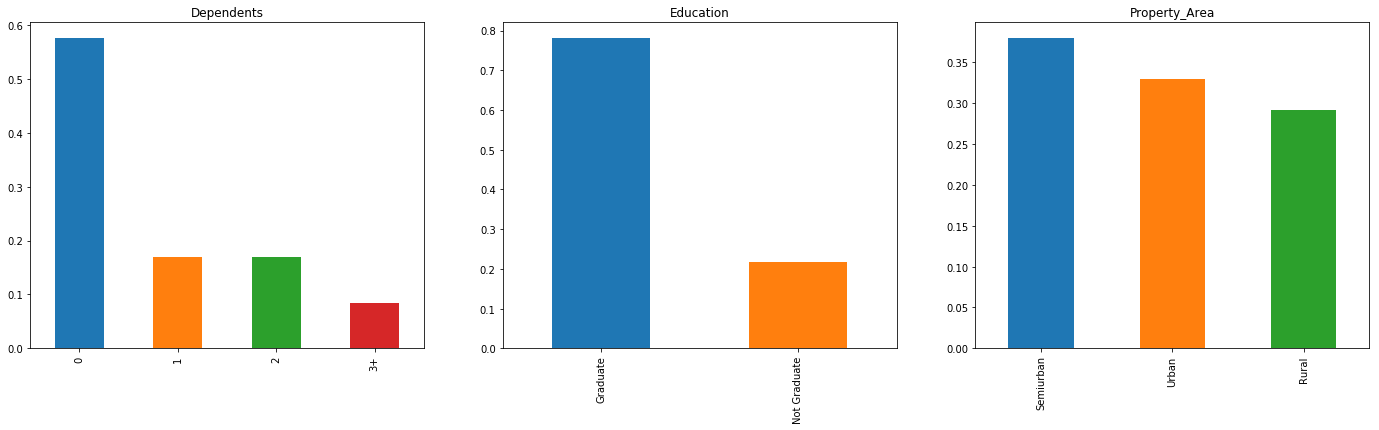

In [15]:
#Visualizing Ordinal Independent Variables
plt.figure(1)
plt.subplot(131)
training_set['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents')
plt.subplot(132) 
training_set['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133)
training_set['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

In [16]:
#From above graph, we see that Most of the applicants don't have dependents. Also, we need to change 3+ to 3
# Around 80% of the applicants are Graduates
# Most of the applicants are from Semiurban areas

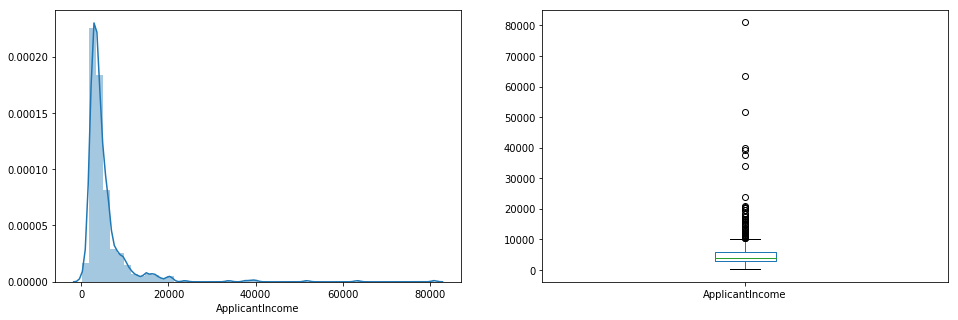

In [17]:
#Visualizing Numerical Independent Variables
#Visualizing Applicant Income
plt.figure(1)
plt.subplot(121)
sns.distplot(training_set["ApplicantIncome"])
plt.subplot(122)
training_set["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

In [18]:
# It can be seen that the data is not normally distributed. 
#Boxplot shows the presence of a lot of outliers due to income disparity in the society.

Text(0.5, 0.98, '')

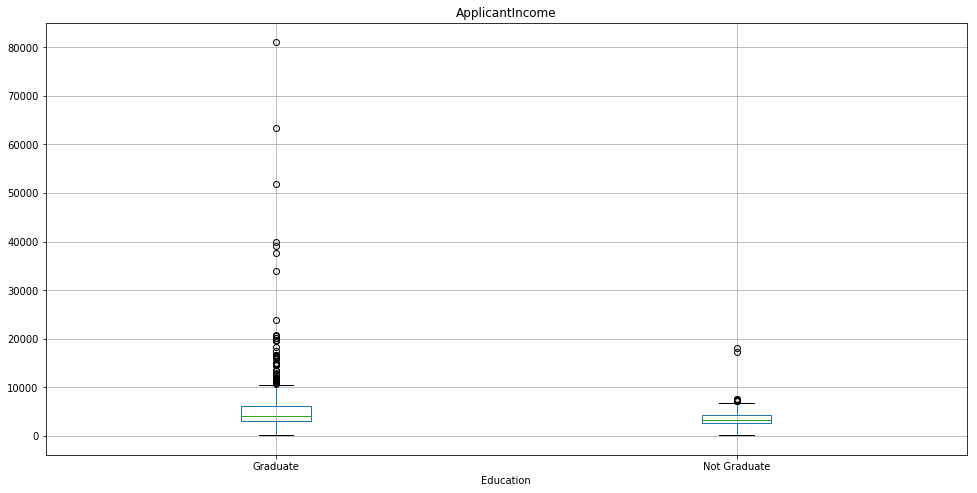

In [19]:
#Visualizing by Education
training_set.boxplot(column="ApplicantIncome",by="Education",figsize=(16,8))
plt.suptitle("")

#We can see that there are higher number of Graduates with very high incomes.

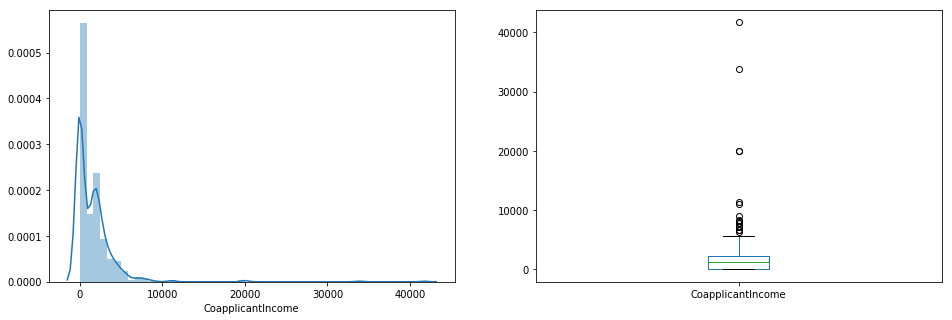

In [20]:
#Visualizing Co-Applicant Income
plt.figure(1)
plt.subplot(121)
sns.distplot(training_set["CoapplicantIncome"])
plt.subplot(122)
training_set["CoapplicantIncome"].plot.box(figsize=(16,5))
plt.show()

In [21]:
#We see similar trend as the Applicant Income. Not normally distributed and a lot of outliers.

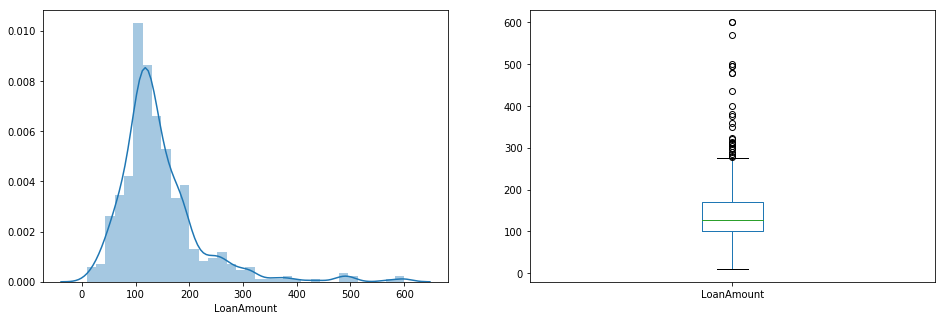

In [22]:
#Visualizing LoanAmount
#Loan Amount contains NA values as well. Ignore null values and visualize
plt.figure(1)
plt.subplot(121)
df=training_set.dropna()
sns.distplot(df["LoanAmount"])
plt.subplot(122)
df["LoanAmount"].plot.box(figsize=(16,5))
plt.show()

In [23]:
# Normally distributed and presence of lot of outliers

In [24]:
#Some hypothesis
#Applicants with high income should have more chances of loan approval.
#Applicants who have repaid their previous debts should have higher chances of loan approval.
#Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.
#Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

In [25]:
#Bivariate Analysis
#Categorical Independent variable vs Target Variable

#Gender vs Loan Status
Gender=pd.crosstab(training_set['Gender'],training_set['Loan_Status']) 
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


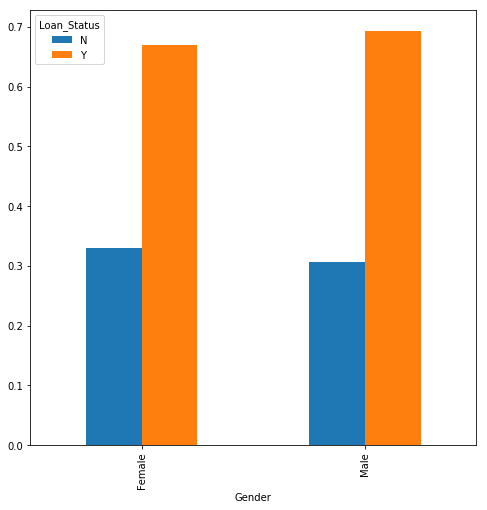

In [26]:
Gender.div(Gender.sum(1).astype("float"),axis=0).plot(kind="bar",figsize=(8,8))

In [27]:
#We can see similar graph for boty the categories of Gender.

#Married vs Loan Status
Married=pd.crosstab(training_set['Married'],training_set['Loan_Status']) 
Married

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


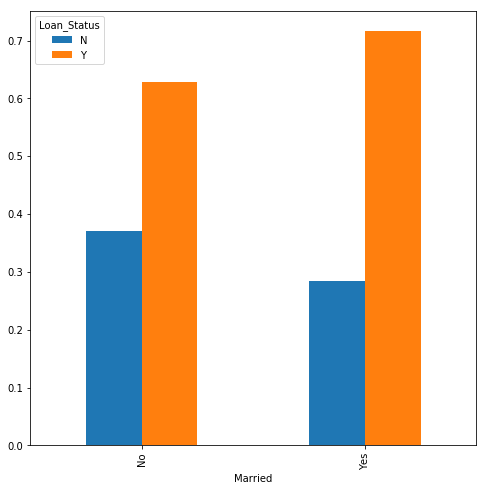

In [28]:
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(8,8))
#Proportion of Married applicants is higher for approved loans

In [29]:
#Dependents vs Loan Status
Dependents=pd.crosstab(training_set['Dependents'],training_set['Loan_Status']) 
Dependents

Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


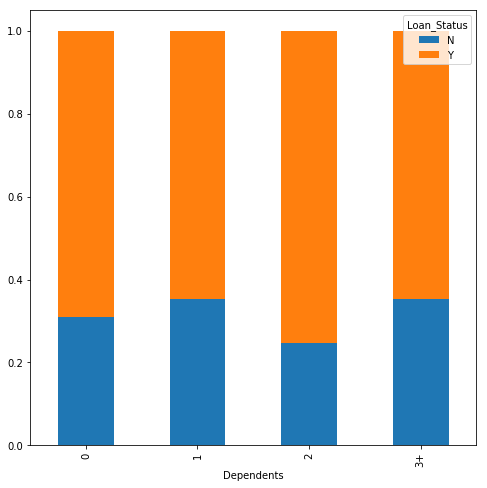

In [30]:
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
#Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.

In [31]:
#Education vs Loan Status
Education=pd.crosstab(training_set['Education'],training_set['Loan_Status']) 
Education

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


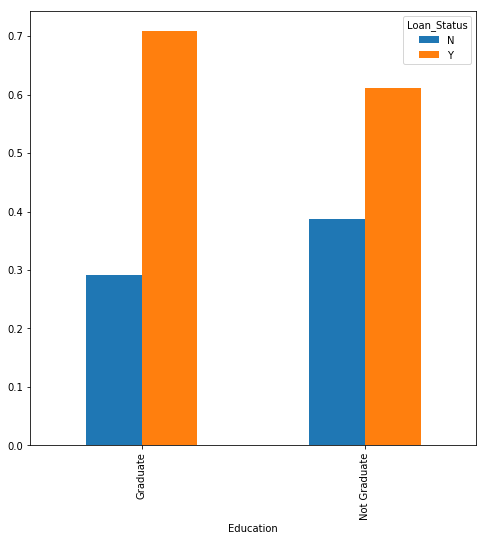

In [32]:
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(8,8))

In [33]:
#Self Employed vs Loan Status
Self_Employed=pd.crosstab(training_set['Self_Employed'],training_set['Loan_Status']) 
Self_Employed

Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


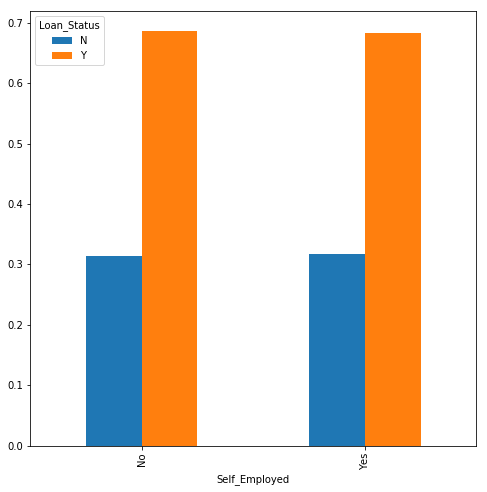

In [34]:
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(8,8))

In [35]:
#Credit History vs Loan Status
Credit_History=pd.crosstab(training_set['Credit_History'],training_set['Loan_Status']) 
Credit_History

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


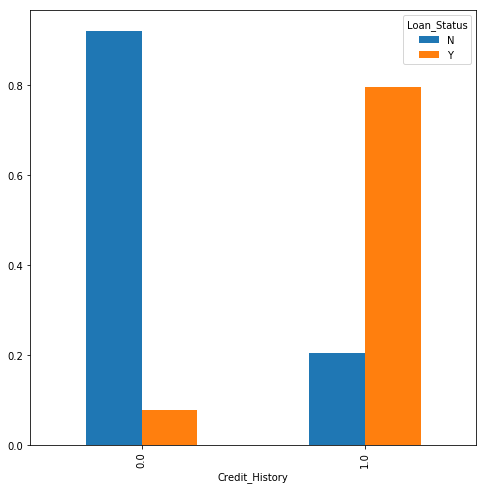

In [36]:
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(8,8))
#People with credit history as 1 are more likely to get their loans approved

In [37]:
#Property Area vs Loan Status
Property_Area=pd.crosstab(training_set['Property_Area'],training_set['Loan_Status']) 
Property_Area

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


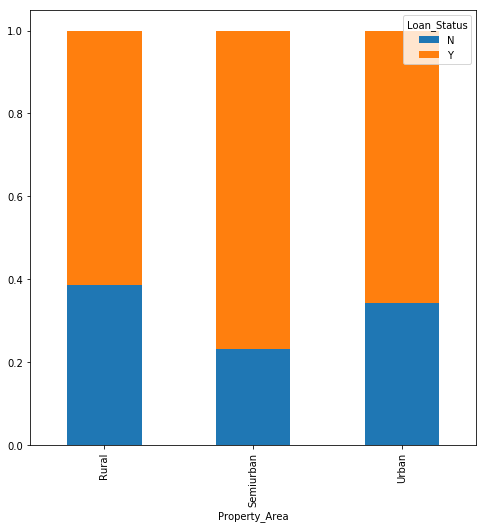

In [38]:
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize=(8,8))
#Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

Loan_Status
N    AxesSubplot(0.125,0.125;0.775x0.755)
Y    AxesSubplot(0.125,0.125;0.775x0.755)
Name: ApplicantIncome, dtype: object

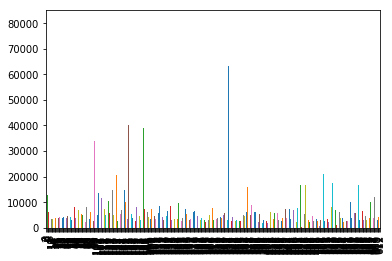

In [39]:
#Numerical Independent Variable vs Target Variable

#Applicant Income vs Loan Status
training_set.groupby("Loan_Status")["ApplicantIncome"].plot.bar()

In [40]:
#We will try to find the mean income of people for which the loan has been approved vs the mean income of people 
#for which the loan has not been approved.

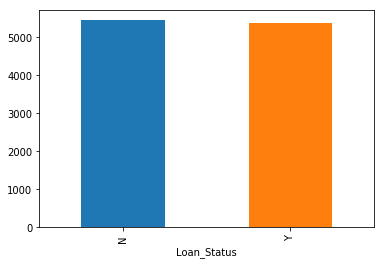

In [41]:
training_set.groupby("Loan_Status")["ApplicantIncome"].mean().plot.bar()

In [42]:
#Here, the y axis represents the mean applicant income. Let us create bins to visualize further
bins = [0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
training_set['Income_bin'] = pd.cut(df['ApplicantIncome'],bins,labels=group)

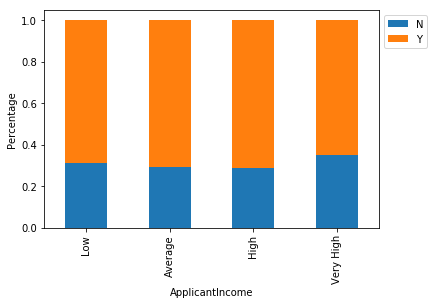

In [43]:
Income_bin=pd.crosstab(training_set['Income_bin'],training_set['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1, 1))

In [44]:
#From the above graph, we can infer that Applicant's Income does not affect the chance of loan approval.
#So, our hypothesis is wrong.

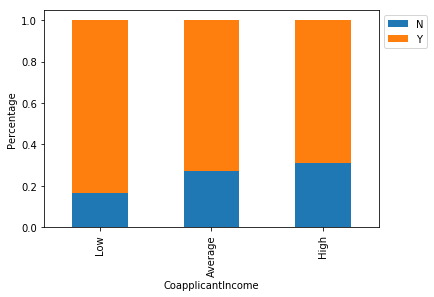

In [45]:
#Coapplicant Income vs Loan Status
bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
training_set['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(training_set['Coapplicant_Income_bin'],training_set['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome') 
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1, 1))

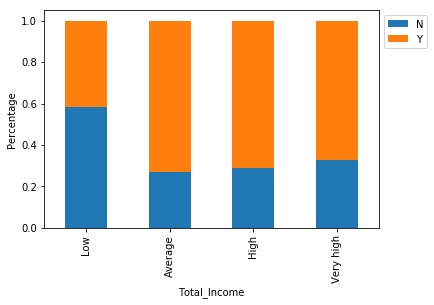

In [46]:
#It shows that if Coapplicant's income is less than chances of getting loan is higher.
#But this does not look right. The possible reason behind this may be that most of the applicants don’t have any 
#coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. 
#So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize 
#the combined effect of income on loan approval.

training_set["Total_Income"] = training_set["ApplicantIncome"] + training_set["CoapplicantIncome"]
bins = [0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
training_set['Total_Income_bin']=pd.cut(training_set['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(training_set['Total_Income_bin'],training_set['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income')  
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1, 1))

In [47]:
#We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as 
#compared to that of applicants with Average, High and Very High Income.

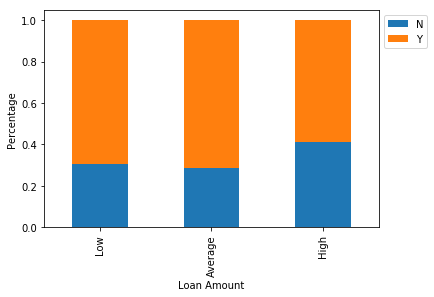

In [48]:
#Loan Amount vs Loan Status
bins = [0,100,200,700]
group = ["Low", "Average", "High"]
training_set["LoanAmount_bin"] = pd.cut(df["LoanAmount"],bins,labels=group)
LoanAmount_bin = pd.crosstab(training_set["LoanAmount_bin"],training_set["Loan_Status"])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel("Loan Amount")
plt.ylabel("Percentage")
plt.legend(bbox_to_anchor=(1,1))

In [49]:
#Proportion of approved loans is higher for Low and Average Loan Amount

In [50]:
#Dropping the bins
training_set=training_set.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [51]:
#Replace 3+ with 3 in Dependent variable
training_set["Dependents"].replace('3+',3,inplace=True)
test_set["Dependents"].replace('3+',3,inplace=True)

#Convert Y to 1 and N to 0 in Loan Status
training_set["Loan_Status"].replace("N",0,inplace=True)
training_set["Loan_Status"].replace("Y",1,inplace=True)

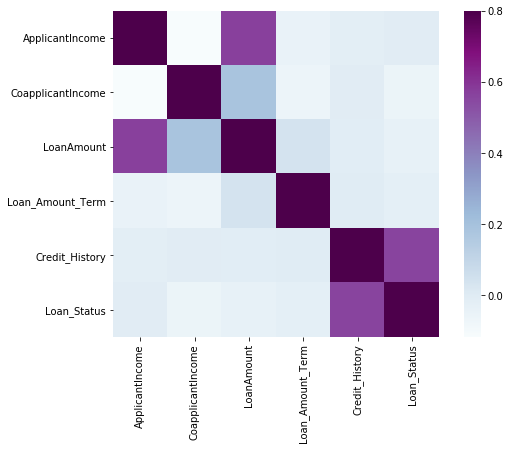

In [52]:
#Visualizing correlation between all numerical variables
matrix=training_set.corr()
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=0.8, square=True, cmap="BuPu")

#Most correlated are (Applicant Income and Loan Amount) and (Credit History and Loan Status)

In [53]:
#Treating Missing values
# For categorical variable, impute by mode and for numerical variable, impute by mean or mdeian
training_set.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [54]:
training_set["Gender"].fillna(training_set["Gender"].mode()[0],inplace=True)
training_set['Married'].fillna(training_set['Married'].mode()[0], inplace=True) 
training_set['Dependents'].fillna(training_set['Dependents'].mode()[0], inplace=True) 
training_set['Self_Employed'].fillna(training_set['Self_Employed'].mode()[0], inplace=True) 
training_set['Credit_History'].fillna(training_set['Credit_History'].mode()[0], inplace=True)

In [55]:
#Treating missing in Loan Amount Terms
training_set["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [56]:
#It can be seen that in loan amount term variable, the value of 360 is repeating the most. 
#So we will replace the missing values in this variable using the mode of this variable.
training_set['Loan_Amount_Term'].fillna(training_set['Loan_Amount_Term'].mode()[0], inplace=True)

In [57]:
#We will use median to fill the null values in Loan Amount as earlier we saw that loan amount have outliers 
#so the mean will not be the proper approach as it is highly affected by the presence of outliers.
training_set["LoanAmount"].fillna(training_set["LoanAmount"].median(),inplace=True)

In [58]:
#Checking
training_set.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [59]:
# Imputing missing values in test dataset with same approach
test_set['Gender'].fillna(test_set['Gender'].mode()[0], inplace=True) 
test_set['Dependents'].fillna(test_set['Dependents'].mode()[0], inplace=True) 
test_set['Self_Employed'].fillna(test_set['Self_Employed'].mode()[0], inplace=True) 
test_set['Credit_History'].fillna(test_set['Credit_History'].mode()[0], inplace=True) 
test_set['Loan_Amount_Term'].fillna(test_set['Loan_Amount_Term'].mode()[0], inplace=True) 
test_set['LoanAmount'].fillna(test_set['LoanAmount'].median(), inplace=True)
test_set.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

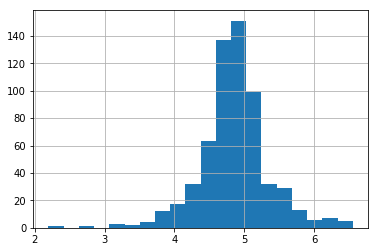

In [60]:
#Outlier Treatment
training_set["LoanAmount_log"] = np.log(training_set["LoanAmount"])
training_set["LoanAmount_log"].hist(bins=20)

In [61]:
test_set["LoanAmount_log"] = np.log(test_set["LoanAmount"])

In [62]:
#Dropping Loan ID as it does not affect the loan status
training_set=training_set.drop("Loan_ID",axis=1)
test_set=test_set.drop("Loan_ID",axis=1)

In [63]:
# Categorizing Dependents as Singleton, Small Family or Large Family
training_set['No Dependents'] = training_set['Dependents'].map(lambda d : 1 if d=='0' else 0)
training_set['Singleton'] = training_set['Dependents'].map(lambda d : 1 if d=='1' else 0)
training_set['Small Family'] = training_set['Dependents'].map(lambda d : 1 if d=='2' else 0)
training_set['Large Family'] = training_set['Dependents'].map(lambda d : 1 if d=='3' else 0)
training_set.drop(['Dependents'],axis=1,inplace=True)

test_set['No Dependents'] = test_set['Dependents'].map(lambda d : 1 if d=='0' else 0)
test_set['Singleton'] = test_set['Dependents'].map(lambda d : 1 if d=='1' else 0)
test_set['Small Family'] = test_set['Dependents'].map(lambda d : 1 if d=='2' else 0)
test_set['Large Family'] = test_set['Dependents'].map(lambda d : 1 if d=='3' else 0)
test_set.drop(['Dependents'],axis=1,inplace=True)

In [64]:
# Categorizing Loan Term
training_set['Very_Short_Term'] = training_set['Loan_Amount_Term'].map(lambda t: 1 if t<=60 else 0)
training_set['Short_Term'] = training_set['Loan_Amount_Term'].map(lambda t: 1 if t>60 and t<180 else 0)
training_set['Long_Term'] = training_set['Loan_Amount_Term'].map(lambda t: 1 if t>=180 and t<=300  else 0)
training_set['Very_Long_Term'] = training_set['Loan_Amount_Term'].map(lambda t: 1 if t>300 else 0)

test_set['Very_Short_Term'] = test_set['Loan_Amount_Term'].map(lambda t: 1 if t<=60 else 0)
test_set['Short_Term'] = test_set['Loan_Amount_Term'].map(lambda t: 1 if t>60 and t<180 else 0)
test_set['Long_Term'] = test_set['Loan_Amount_Term'].map(lambda t: 1 if t>=180 and t<=300  else 0)
test_set['Very_Long_Term'] = test_set['Loan_Amount_Term'].map(lambda t: 1 if t>300 else 0)

In [65]:
#Categorizing Credit History
training_set['Credit_History_Bad'] = training_set['Credit_History'].map(lambda c: 1 if c==0 else 0)
training_set['Credit_History_Good'] = training_set['Credit_History'].map(lambda c: 1 if c==1 else 0)
training_set['Credit_History_Unknown'] = training_set['Credit_History'].map(lambda c: 1 if c==2 else 0)
training_set.drop('Credit_History', axis=1, inplace=True)

test_set['Credit_History_Bad'] = test_set['Credit_History'].map(lambda c: 1 if c==0 else 0)
test_set['Credit_History_Good'] = test_set['Credit_History'].map(lambda c: 1 if c==1 else 0)
test_set['Credit_History_Unknown'] = test_set['Credit_History'].map(lambda c: 1 if c==2 else 0)
test_set.drop('Credit_History', axis=1, inplace=True)

In [66]:
#Creating Dummy variables for categorical variables
training_set=pd.get_dummies(training_set)
test_set=pd.get_dummies(test_set)

In [67]:
training_set.iloc[1:10,:]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,LoanAmount_log,No Dependents,Singleton,Small Family,Large Family,...,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,4583,1508.0,128.0,360.0,0,4.852030,0,1,0,0,...,1,0,1,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1,4.189655,1,0,0,0,...,1,0,1,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1,4.787492,1,0,0,0,...,1,0,1,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1,4.948760,1,0,0,0,...,1,1,0,1,0,1,0,0,0,1
5,5417,4196.0,267.0,360.0,1,5.587249,0,0,1,0,...,1,0,1,1,0,0,1,0,0,1
6,2333,1516.0,95.0,360.0,1,4.553877,1,0,0,0,...,1,0,1,0,1,1,0,0,0,1
7,3036,2504.0,158.0,360.0,0,5.062595,0,0,0,0,...,1,0,1,1,0,1,0,0,1,0
8,4006,1526.0,168.0,360.0,1,5.123964,0,0,1,0,...,1,0,1,1,0,1,0,0,0,1
9,12841,10968.0,349.0,360.0,0,5.855072,0,1,0,0,...,1,0,1,1,0,1,0,0,1,0


In [68]:
#Separate the dependent variable
X=training_set.drop("Loan_Status",1)
y=training_set.Loan_Status

#Divide training dataset into train and validation to know the accuracy of the model

from sklearn.model_selection import train_test_split
X_train, x_cv, Y_train, y_cv = train_test_split(X,y,test_size=0.3)

In [69]:
#Building and fitting the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [70]:
#Predicting the target variable
pred_cv = classifier.predict(x_cv)

In [71]:
#Calculate the accuracy
accuracy_score(y_cv,pred_cv)

0.7783783783783784

In [72]:
#We see that our model is 80% accurate. Predict this on test dataset. 
#We will apply feature engineering and startified k fold cross validation for better results

#We will create the following three new features:
#Total Income - As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. 
#If the total income is high, chances of loan approval might also be high.
#EMI - EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that 
#people who have high EMI’s might find it difficult to pay back the loan. 
#We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.
#Balance Income - This is the income left after the EMI has been paid. Idea behind creating this variable is that if 
#this value is high, the chances are high that a person will repay the loan and hence increasing 
#the chances of loan approval.

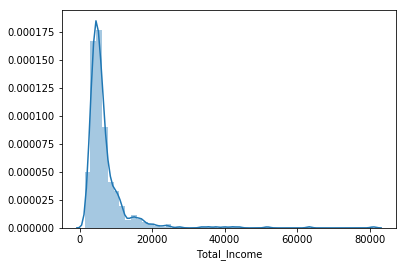

In [73]:
training_set['Total_Income']=training_set['ApplicantIncome']+training_set['CoapplicantIncome'] 
test_set['Total_Income']=test_set['ApplicantIncome']+test_set['CoapplicantIncome']

#Checking distribution of Total Income
sns.distplot(training_set["Total_Income"])

In [74]:
# It is shifted towards left i.e., distribution is right skewed. Use log transformation for normal distribution
training_set["Total_Income_log"] = np.log(training_set["Total_Income"])
test_set["Total_Income_log"] = np.log(test_set["Total_Income"])

In [75]:
#EMI
training_set['EMI']=training_set['LoanAmount']/training_set['Loan_Amount_Term'] 
test_set['EMI']=test_set['LoanAmount']/test_set['Loan_Amount_Term']

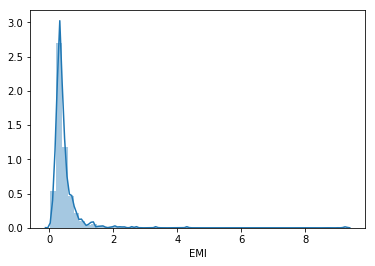

In [76]:
sns.distplot(training_set["EMI"])

In [77]:
#Balance Income
training_set["Balance Income"] = training_set["Total_Income"] - (training_set["EMI"]*1000)
test_set["Balance Income"] = test_set["Total_Income"] - (test_set["EMI"]*1000)

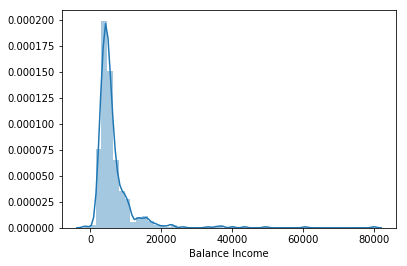

In [78]:
sns.distplot(training_set["Balance Income"])

In [79]:
#Dropping the variables
training_set=training_set.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income'], axis=1) 
test_set=test_set.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income'], axis=1)

In [80]:
training_set.dtypes

Loan_Status                  int64
LoanAmount_log             float64
No Dependents                int64
Singleton                    int64
Small Family                 int64
Large Family                 int64
Very_Short_Term              int64
Short_Term                   int64
Long_Term                    int64
Very_Long_Term               int64
Credit_History_Bad           int64
Credit_History_Good          int64
Credit_History_Unknown       int64
Gender_Female                uint8
Gender_Male                  uint8
Married_No                   uint8
Married_Yes                  uint8
Education_Graduate           uint8
Education_Not Graduate       uint8
Self_Employed_No             uint8
Self_Employed_Yes            uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
Total_Income_log           float64
EMI                        float64
Balance Income             float64
dtype: object

In [99]:
#Building the Model

# Logistic Regression with Stratified k fold cross validation

X = training_set.drop("Loan_Status",1)
y = training_set.Loan_Status

from sklearn.model_selection import StratifiedKFold

i=1
kf = StratifiedKFold(n_splits = 5, random_state=1, shuffle = True)
for train_index, test_index in kf.split(X,y):
    print("\n{} of kfold {}".format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index], X.loc[test_index]
    ytr,yvl = y[train_index], y[test_index]
    classifier = LogisticRegression(random_state=1)
    classifier.fit(xtr,ytr)
    pred_test = classifier.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print("accuracy_score",score)
    i+=1
    
pred_test = classifier.predict(test_set)
pred = classifier.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.8032786885245902

4 of kfold 5
accuracy_score 0.7868852459016393

5 of kfold 5
accuracy_score 0.8278688524590164


In [100]:
submission = pd.read_csv("sample_submission_S7jWYrJ.csv")

In [101]:
submission["Loan_Status"] = pred_test
submission["Loan_ID"] = test_original["Loan_ID"]
submission["Loan_Status"].replace(0,"N",inplace=True)
submission["Loan_Status"].replace(1,"Y",inplace=True)

In [102]:
# Converting submission file to .csv format 
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Result.csv')

In [155]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 5, criterion = 'entropy', random_state = 0, max_depth = 25)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

cm

array([[22, 21],
       [14, 97]], dtype=int64)

In [156]:
accuracy_score(y_test,y_pred)

0.7727272727272727

In [157]:
#We will tune the hyperparamteres using grid search

from sklearn.model_selection import GridSearchCV

# Provide range for max_depth from 1 to 26 with an interval of 2 and from 1 to 200 with an interval of 5 for n_estimators 
paramgrid = {'max_depth': list(range(1, 26, 2)), 'n_estimators': list(range(1, 200, 5))}

grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

from sklearn.model_selection import train_test_split 
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)

# Fit the grid search model 
grid_search.fit(x_train,y_train)


C:\Users\swatiagarwal7\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25], 'n_estimators': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [158]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=61, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [161]:
#So, the optimized value for the max_depth variable is 3 and for n_estimator is 61.

grid_search.best_score_

0.8298368298368298

In [162]:
i=1
kf = StratifiedKFold(n_splits = 5, random_state=1, shuffle = True)
for train_index, test_index in kf.split(X,y):
    print("\n{} of kfold {}".format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index], X.loc[test_index]
    ytr,yvl = y[train_index], y[test_index]
    classifier = RandomForestClassifier(random_state=1, max_depth =3, n_estimators = 61)
    classifier.fit(xtr,ytr)
    pred_test = classifier.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print("accuracy_score",score)
    i+=1
    
pred_test = classifier.predict(test_set)
pred = classifier.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.8032786885245902

4 of kfold 5
accuracy_score 0.7868852459016393

5 of kfold 5
accuracy_score 0.8442622950819673


In [164]:
submission["Loan_Status"] = pred_test
submission["Loan_ID"] = test_original["Loan_ID"]
submission["Loan_Status"].replace(0,"N",inplace=True)
submission["Loan_Status"].replace(1,"Y",inplace=True)

# Converting submission file to .csv format 
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('ResultRandomForest.csv')

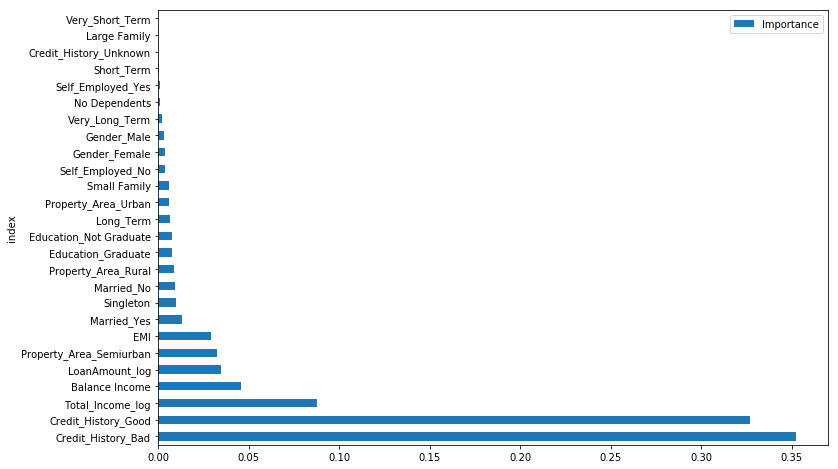

In [174]:
# Find the important featues
importances = pd.DataFrame()
importances['Importance'] = classifier.feature_importances_
importances['index'] =X.columns
importances.sort_values(by=["Importance"], ascending=False, inplace=True)
importances.set_index('index',inplace=True)
importances.plot(kind="barh",figsize=(12,8))

In [175]:
# We can see that Credit History, Total Income, Balance Income are the most important features

In [177]:
#Naive Bayes Algorithm

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [178]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

cm

array([[ 20,  23],
       [  4, 107]], dtype=int64)

In [179]:
accuracy_score(y_test,y_pred)

0.8246753246753247

In [197]:
# XGBoost
from xgboost import XGBClassifier

# Grid Search
paramgrid = {'max_depth': list(range(2,20,2)), 'n_estimators': list(range(60, 1000, 10)),
             'colsample_bytree' : [0.3,0.4]}

grid_search=GridSearchCV(XGBClassifier(random_state=1,
                                       objective='binary:logistic',learning_rate=0.01),paramgrid)
grid_search = grid_search.fit(X_train,y_train)
best_accuracy=grid_search.best_score_
best_parameters = grid_search.best_params_

In [198]:
best_accuracy

0.8152173913043478

In [199]:
best_parameters

{'colsample_bytree': 0.4, 'max_depth': 2, 'n_estimators': 360}

In [200]:
i=1
kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    classifier = XGBClassifier(random_state=1, objective='binary:logistic',learning_rate=0.01, 
                          max_depth = 2, n_estimators=360,colsample_bytree=0.4)
    classifier.fit(xtr,ytr)
    pred_test = classifier.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('Accuracy Score',score)
    i+=1
pred_test=classifier.predict(test_set)
pred3=classifier.predict_proba(test_set)[:,1]


1 of kfold 5
Accuracy Score 0.8064516129032258

2 of kfold 5
Accuracy Score 0.8306451612903226

3 of kfold 5
Accuracy Score 0.8032786885245902

4 of kfold 5
Accuracy Score 0.7868852459016393

5 of kfold 5
Accuracy Score 0.8360655737704918


In [201]:
#Writting result to submission file
submission['Loan_Status']=pred_test 
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('XGBoost.csv')

<function float64.mean>